<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_MSFT_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-30 10:07:54--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.101, 173.194.212.102, 173.194.212.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jealv893gmmnk2n6hokte5h343fr01bp/1672394850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0e531bd7-b37a-451a-871e-3121ae77b3be [following]
--2022-12-30 10:07:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jealv893gmmnk2n6hokte5h343fr01bp/1672394850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0e531bd7-b37a-451a-871e-3121ae77b3be
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to do

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/MSFT_2021_Q4_20210727發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Microsoft,0.0,0.0,proper noun,compound,True,False,False,False
1,Corporation,0.0,0.0,proper noun,root,True,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9853,lines,0.0,0.0,noun,direct object,True,False,False,False
9854,at,0.0,0.0,adposition,prepositional modifier,True,True,False,False
9855,this,0.0,0.0,determiner,determiner,True,True,False,False
9856,time,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          9858 non-null   object 
 1   Polarity      9858 non-null   float64
 2   Subjectivity  9858 non-null   float64
 3   Pos_          9858 non-null   object 
 4   Dep_          9852 non-null   object 
 5   Alpha         9858 non-null   bool   
 6   Stopword      9858 non-null   bool   
 7   Punct         9858 non-null   bool   
 8   Num           9858 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 423.7+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Microsoft,0.0,0.0,proper noun,compound,True,False,False,False
1,Corporation,0.0,0.0,proper noun,root,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
5,MSFT,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
9,Results,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9842,thank,0.0,0.0,verb,root,True,False,False,False
9846,participation,0.0,0.0,noun,object of preposition,True,False,False,False
9851,disconnect,0.0,0.0,verb,conjunct,True,False,False,False
9853,lines,0.0,0.0,noun,direct object,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
9,Results,0.0,0.0,noun,compound,True,False,False,False
17,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
69,welcome,0.8,0.9,adjective,conjunct,True,False,False,False
84,time,0.0,0.0,noun,object of preposition,True,False,False,False
87,participants,0.0,0.0,noun,nominal subject,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9842,thank,0.0,0.0,verb,root,True,False,False,False
9846,participation,0.0,0.0,noun,object of preposition,True,False,False,False
9851,disconnect,0.0,0.0,verb,conjunct,True,False,False,False
9853,lines,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
104,follow,0.0,0.0,verb,root,True,False,False,False
106,formal,0.0,0.0,adjective,adjectival modifier,True,False,False,False
107,presentation,0.0,0.0,noun,direct object,True,False,False,False
121,recorded,0.0,0.0,verb,root,True,False,False,False
131,host,0.0,0.0,noun,direct object,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9819,soon,0.0,0.0,adverb,adverbial modifier,True,False,False,False
9836,concludes,0.0,0.0,verb,root,True,False,False,False
9839,conference,0.0,0.0,noun,direct object,True,False,False,False
9842,thank,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
106,formal,0.00,0.0,adjective,adjectival modifier,True,False,False,False
212,financial,0.00,0.0,adjective,adjectival modifier,True,False,False,False
223,prepared,0.00,0.0,adjective,adjectival modifier,True,False,False,False
238,non,0.00,0.0,adjective,adjectival modifier,True,False,False,False
240,GAAP,0.00,0.0,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9768,general,0.05,0.5,adjective,adjectival modifier,True,False,False,False
9774,gross,0.00,0.0,adjective,adjectival modifier,True,False,False,False
9779,healthy,0.50,0.5,adjective,adjectival complement,True,False,False,False
9812,forward,0.00,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    800.000000
mean       0.059635
std        0.197292
min       -0.700000
25%        0.000000
50%        0.000000
75%        0.062500
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    800.000000
mean       0.248175
std        0.295514
min        0.000000
25%        0.000000
50%        0.000000
75%        0.454545
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
106,formal,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
212,financial,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
223,prepared,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
238,non,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
240,GAAP,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
9768,general,0.05,0.5,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
9774,gross,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9779,healthy,0.50,0.5,adjective,adjectival complement,True,False,False,False,Positive,Subjective
9812,forward,0.00,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,71
1,Neutral,Objective,404
2,Neutral,Subjective,120
3,Positive,Objective,5
4,Positive,Subjective,200


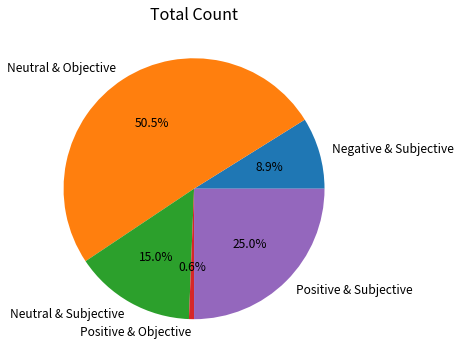

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Objective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

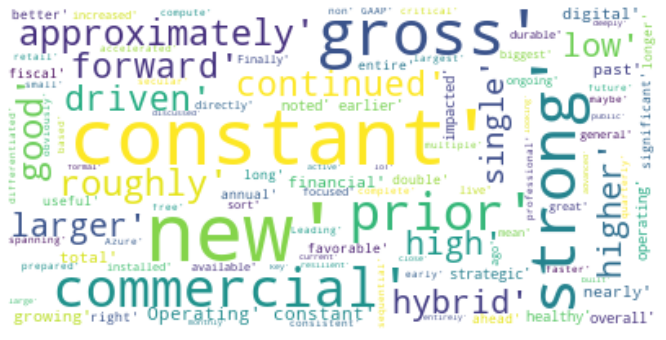

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Microsoft Corporation (NASDAQ:MSFT) Q4 2021 Re...,0.283333,0.466667
1,"At this time, all participants are in a listen...",0.000000,0.000000
2,A question-and-answer session will follow the ...,0.000000,0.000000
3,[Operator Instructions],0.000000,0.000000
4,"As a reminder, this conference is being recorded.",0.000000,0.000000
...,...,...,...
421,And we look forward to speaking with all of yo...,0.000000,0.000000
422,"Amy HoodThank you, everyone.",0.000000,0.000000
423,Satya NadellaThank you.,0.000000,0.000000
424,"OperatorLadies and gentlemen, this concludes t...",0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    426.000000
mean       0.092229
std        0.209493
min       -0.800000
25%        0.000000
50%        0.000000
75%        0.192911
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    426.000000
mean       0.292675
std        0.269926
min        0.000000
25%        0.000000
50%        0.300000
75%        0.477273
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Microsoft Corporation (NASDAQ:MSFT) Q4 2021 Re...,0.283333,0.466667,Positive,Subjective
1,"At this time, all participants are in a listen...",0.000000,0.000000,Neutral,Objective
2,A question-and-answer session will follow the ...,0.000000,0.000000,Neutral,Objective
3,[Operator Instructions],0.000000,0.000000,Neutral,Objective
4,"As a reminder, this conference is being recorded.",0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
421,And we look forward to speaking with all of yo...,0.000000,0.000000,Neutral,Objective
422,"Amy HoodThank you, everyone.",0.000000,0.000000,Neutral,Objective
423,Satya NadellaThank you.,0.000000,0.000000,Neutral,Objective
424,"OperatorLadies and gentlemen, this concludes t...",0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,49
1,Neutral,Objective,138
2,Neutral,Subjective,50
3,Positive,Subjective,189


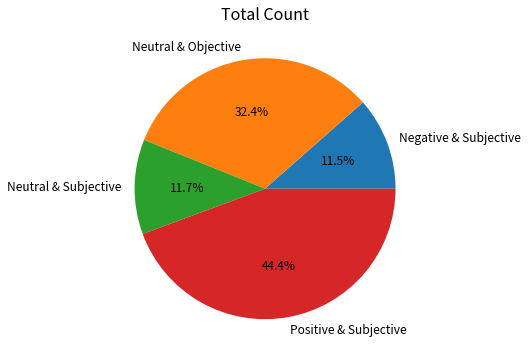

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)During this call, we will make forward-looking statements, which are predictions, projections or other statements about future events.

2)These statements are based on current expectations and assumptions that are subject to risks and uncertainties.

3)Actual results could materially differ because of factors discussed in today’s earnings press release, in the comments made during this conference call and in the Risk Factors section of our Form 10-K, Forms 10-Q and other reports and filings with the Securities and Exchange Commission.

4)In the past three years alone, gaming, security and now LinkedIn, have all surpassed $10 billion in annual revenue.

5)Over the past year we have added new data center regions in 15 countries across five continents, delivering faster access to cloud services and addressing data residency requirements.

6)Azure Synapse brings together data integration, big data and data warehouses into a single service.

7)Our new Azure Applied AI Services help organi

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)At this time, all participants are in a listen-only mode.

2)A question-and-answer session will follow the formal presentation.

3)[Operator Instructions]

4)As a reminder, this conference is being recorded.

5)Thank you.

6)You may begin.

7)Brett IversenGood afternoon and thank you for joining us today.

8)On the Microsoft Investor Relations website, you can find our earnings press release and financial summary slide deck, which is intended to supplement our prepared remarks during today’s call and provides a reconciliation of differences between GAAP and non-GAAP financial measures.

9)Unless otherwise specified, we will refer to the non-GAAP metrics on the call.

10)You can replay the call and view the transcript on the Microsoft Investor Relations website.

11)We do not undertake any duty to update any forward-looking statement.

12)And with that, I’ll turn the call over to Satya.

13)Our commercial cloud surpassed $69 billion in annual revenue, up 34%.

14)And now, we’re taking

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)They are included as additional clarifying items to aid investors in further understanding the Company’s fourth quarter performance in addition to the impact these items and events have on the financial results.

2)All growth comparisons we make on the call today relate to the corresponding period of last year, unless otherwise noted.

3)Where the growth rates are the same in constant currency, we’ll refer to growth rate only.

4)We have seen revenue growth across industries, customer segments and geographies with over 50% of sales coming from outside the United States.

5)Now, I’ll highlight our innovation and our expanding opportunity across the tech stack starting with infrastructure.

6)We’re the only cloud provider with the capability to support every organization’s multi-cloud, hybrid and edge needs.

7)We’re the only cloud provider that helps organizations build sovereignty over their data by bringing together hyperscale, OLTP, analytics and governance workloads.

8)From ABN A

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Microsoft Corporation (NASDAQ:MSFT) Q4 2021 Results Conference Call July 27, 2021 5:00 PM ETCompany ParticipantsBrett Iversen - General Manager, IRSatya Nadella - Chairman and CEOAmy Hood - CFOConference Call ParticipantsKeith Weiss - Morgan StanleyMark Moerdler - Bernstein ResearchBrent Thill - JefferiesKarl Keirstead - UBSMark Murphy - JP MorganBrent Bracelin - Piper SandlerAlex Zukin - Wolfe ResearchKeith Bachman - Bank of MontrealOperatorGreetings, and welcome to the Microsoft Fiscal Year 2021 Fourth Quarter Earnings Conference Call.

2)It is now my pleasure to introduce your host, Brett Iversen, General Manager of Investor Relations.

3)On the call with me are Satya Nadella, Chairman and Chief Executive Officer; Amy Hood, Chief Financial Officer; Alice Jolla, Chief Accounting Officer; and Keith Dolliver, Deputy General Counsel.

4)The non-GAAP financial measures provided should not be considered as a substitute for or superior to the measures of financial performance prepared in

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

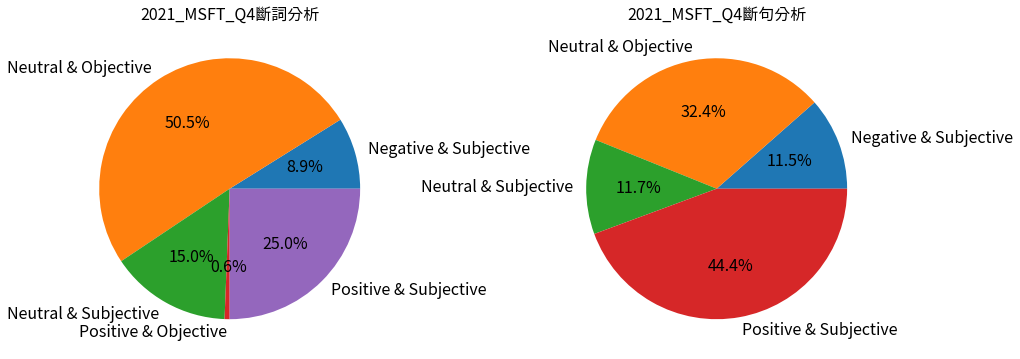

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective","Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2021_MSFT_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2021_MSFT_Q4斷句分析', fontsize=16)


plt.savefig("2021_MSFT_Q4.png")
from google.colab import files
files.download("2021_MSFT_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40